In [1]:
import os
from pathlib import Path

# Define the name of the root directory
ROOT_NAME = "EXPLib20"

# Find the root directory dynamically
current_dir = Path.cwd()
if current_dir.name == ROOT_NAME:
    root_dir = current_dir
else:
    for parent in current_dir.parents:
        if parent.name == ROOT_NAME:
            root_dir = parent
            break
    else:
        raise FileNotFoundError(f"Root directory named '{ROOT_NAME}' not found in the directory tree.")

# Change to the root directory
os.chdir(root_dir)
print(os.getcwd())

e:\RISE-OneDrive\RISE\SAFEXPLAIN-WP3 XAI - General\EXPLib20


In [3]:
import json

result_json = './EXPLib/dl_component/CNN/Object_Detectors/toy_model_v1/toy_model_prediction.json'


f = open(result_json)
data = json.load(f)


In [8]:
import numpy as np
#data['annotations'][0]['bbox']
results = []
for sample in data['annotations']:
    groundtruth_bbox= sample['bbox'] # x1,y1,x2,y2
    prediction_bbox= sample['pred_bbox'] # x1,y1,x2,y2
    
    x1_gt, y1_gt, x2_gt, y2_gt = groundtruth_bbox
    x1_pred, y1_pred, x2_pred, y2_pred = prediction_bbox
    
    x_center_gt = (x1_gt + x2_gt) / 2
    y_center_gt = (y1_gt + y2_gt) / 2
    x_center_pred = (x1_pred + x2_pred) / 2
    y_center_pred = (y1_pred + y2_pred) / 2
    
    width_gt = x2_gt - x1_gt
    height_gt = y2_gt - y1_gt
    width_pred = x2_pred - x1_pred
    height_pred = y2_pred - y1_pred
    
    x_translation = x_center_pred - x_center_gt
    y_translation = y_center_pred - y_center_gt
    
    # Intersection over Union (IoU)
    xA = max(x1_gt, x1_pred)
    yA = max(y1_gt, y1_pred)
    xB = min(x2_gt, x2_pred)
    yB = min(y2_gt, y2_pred)
    
    inter_area = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    groundtruth_area = (x2_gt - x1_gt + 1) * (y2_gt - y1_gt + 1)
    prediction_area = (x2_pred - x1_pred + 1) * (y2_pred - y1_pred + 1)
    iou = inter_area / float(groundtruth_area + prediction_area - inter_area)
    
    results.append([x_center_gt, y_center_gt, groundtruth_area, height_gt, width_gt,
                    x_translation, y_translation, iou])

results = np.array(results)



In [10]:
import matplotlib.pyplot as plt

x_center = results[:, 0]
y_center = results[:, 1]
bbox_area = results[:, 2]
height = results[:, 3]
width = results[:, 4]
x_translation = results[:, 5]
y_translation = results[:, 6]
iou = results[:, 7]

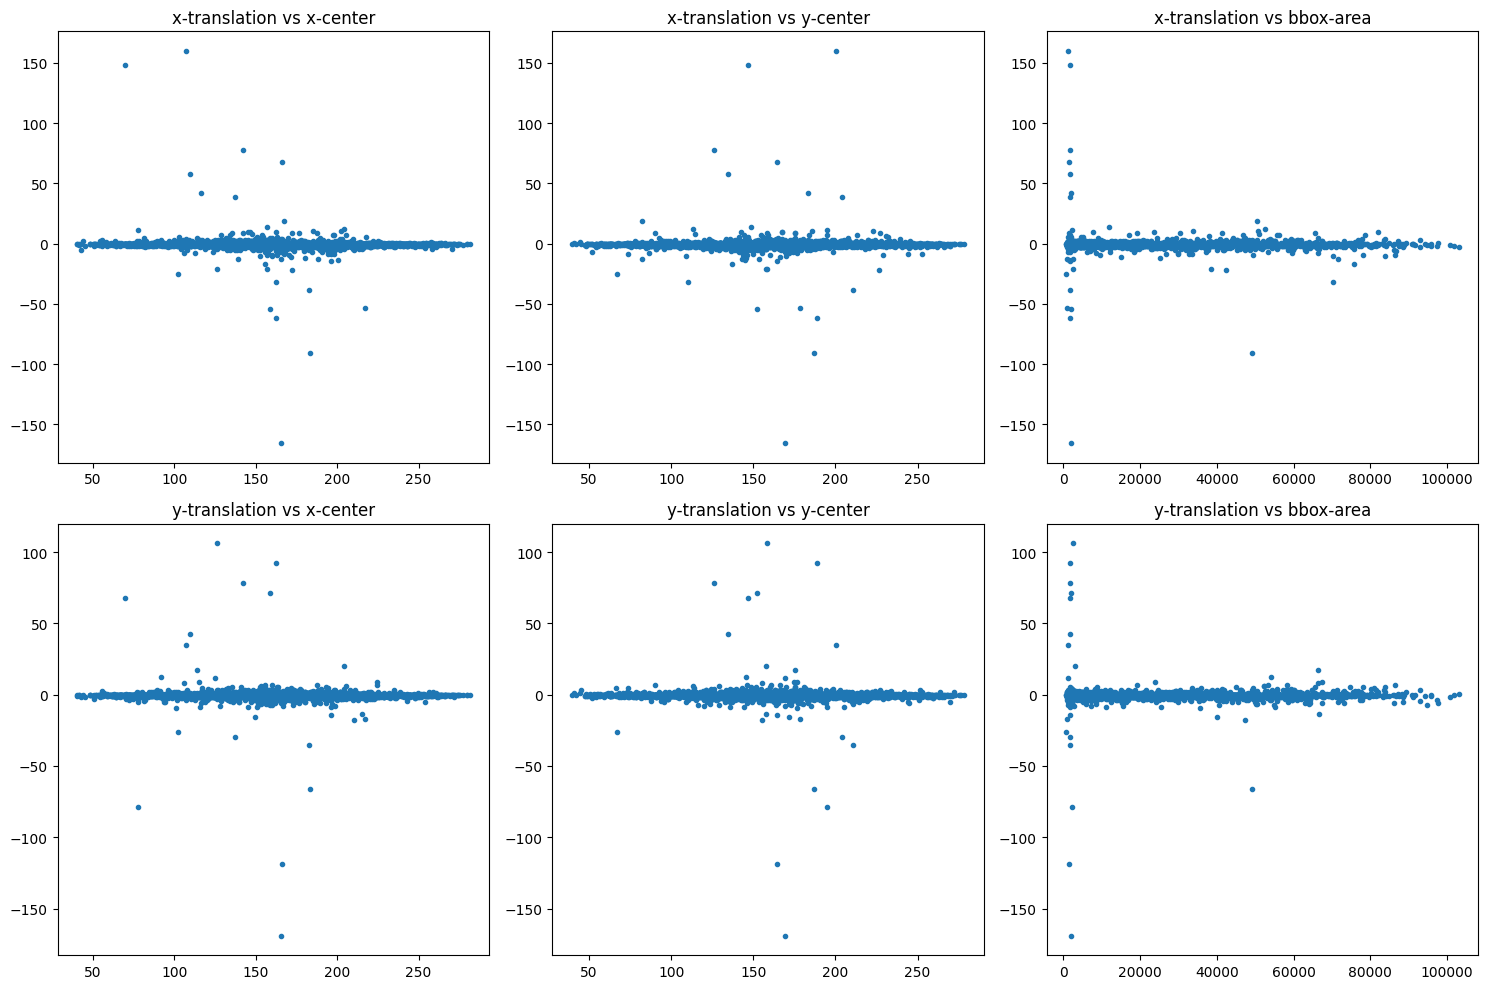

In [11]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].scatter(x_center, x_translation, marker='.')
axs[0, 0].set_title('x-translation vs x-center')
axs[0, 1].scatter(y_center, x_translation, marker='.')
axs[0, 1].set_title('x-translation vs y-center')
axs[0, 2].scatter(bbox_area, x_translation, marker='.')
axs[0, 2].set_title('x-translation vs bbox-area')

axs[1, 0].scatter(x_center, y_translation, marker='.')
axs[1, 0].set_title('y-translation vs x-center')
axs[1, 1].scatter(y_center, y_translation, marker='.')
axs[1, 1].set_title('y-translation vs y-center')
axs[1, 2].scatter(bbox_area, y_translation, marker='.')
axs[1, 2].set_title('y-translation vs bbox-area')

plt.tight_layout()
plt.show()

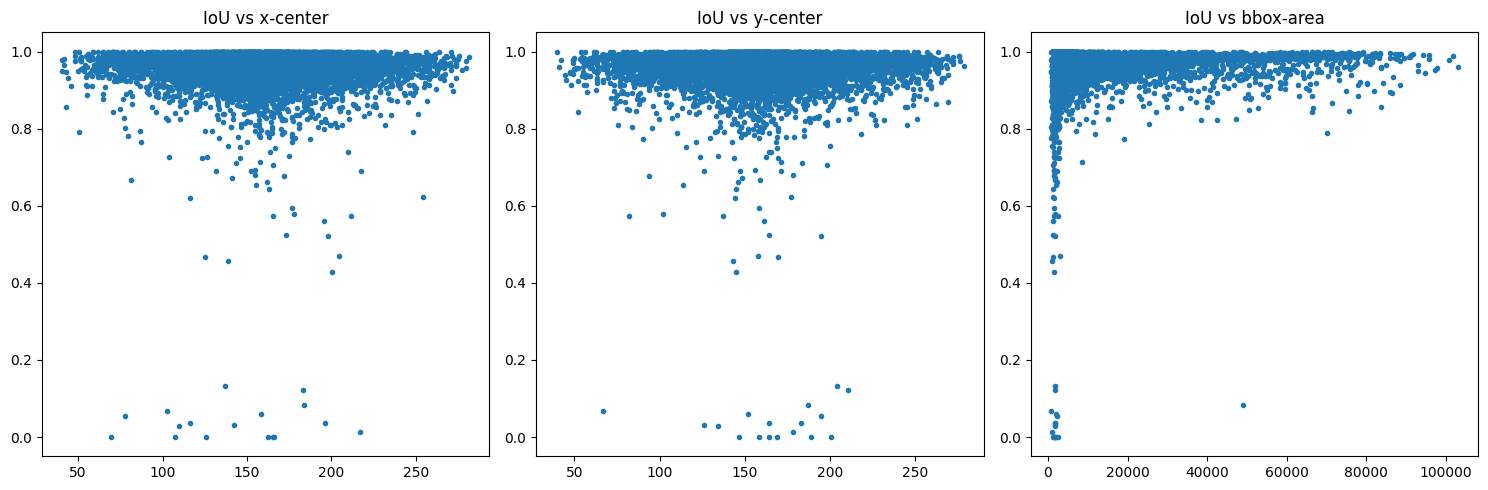

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].scatter(x_center, iou, marker='.')
axs[0].set_title('IoU vs x-center')
axs[1].scatter(y_center, iou, marker='.')
axs[1].set_title('IoU vs y-center')
axs[2].scatter(bbox_area, iou, marker='.')
axs[2].set_title('IoU vs bbox-area')

plt.tight_layout()
plt.show()

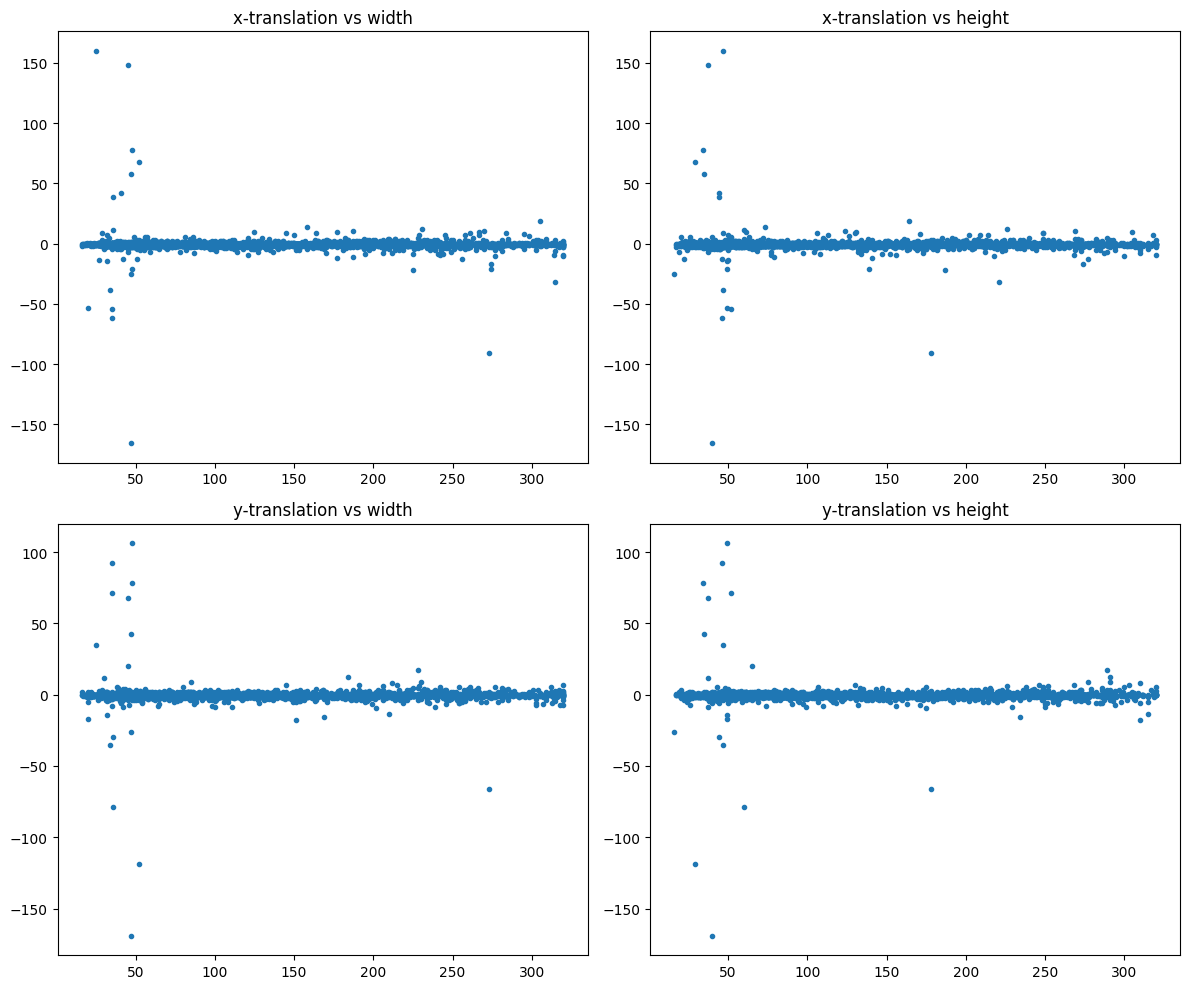

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot x-translation vs width and height
axs[0, 0].scatter(width, x_translation, marker='.')
axs[0, 0].set_title('x-translation vs width')
axs[0, 1].scatter(height, x_translation, marker='.')
axs[0, 1].set_title('x-translation vs height')

# Plot y-translation vs width and height
axs[1, 0].scatter(width, y_translation, marker='.')
axs[1, 0].set_title('y-translation vs width')
axs[1, 1].scatter(height, y_translation, marker='.')
axs[1, 1].set_title('y-translation vs height')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

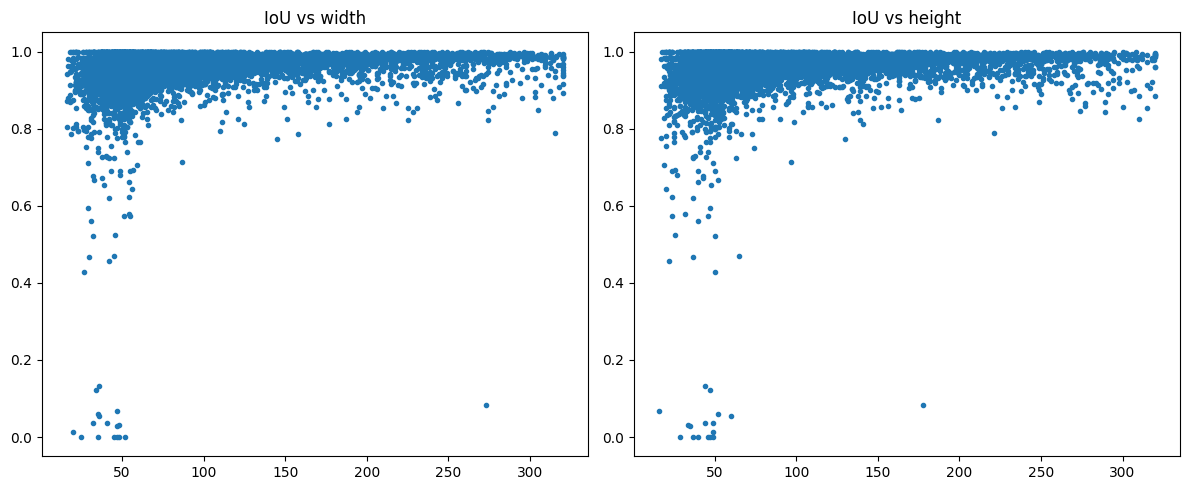

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(width, iou, marker='.')
axs[0].set_title('IoU vs width')

axs[1].scatter(height, iou, marker='.')
axs[1].set_title('IoU vs height')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [15]:
corr_x_translation = np.corrcoef(width, x_translation)[0, 1]
corr_y_translation = np.corrcoef(height, y_translation)[0, 1]
corr_iou_width = np.corrcoef(width, iou)[0, 1]
corr_iou_height = np.corrcoef(height, iou)[0, 1]

print(f"Correlation coefficients:")
print(f"  x-translation vs width: {corr_x_translation}")
print(f"  y-translation vs height: {corr_y_translation}")
print(f"  IoU vs width: {corr_iou_width}")
print(f"  IoU vs height: {corr_iou_height}")

Correlation coefficients:
  x-translation vs width: -0.017883523348908036
  y-translation vs height: 0.0011725796019358323
  IoU vs width: 0.2080700624532671
  IoU vs height: 0.20968644025012959


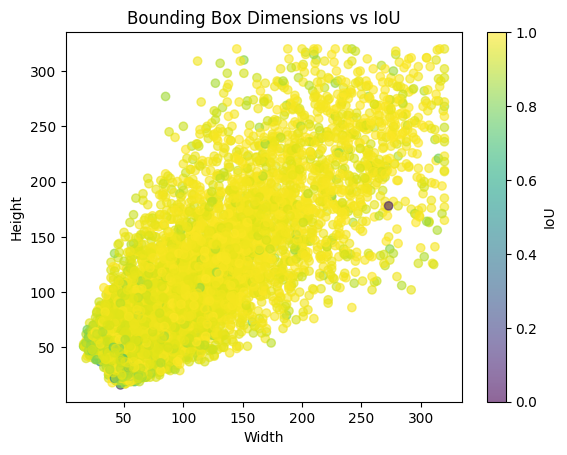

In [16]:
plt.scatter(width, height, c=iou, cmap='viridis', alpha=0.6)
plt.colorbar(label='IoU')
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Bounding Box Dimensions vs IoU')
plt.show()

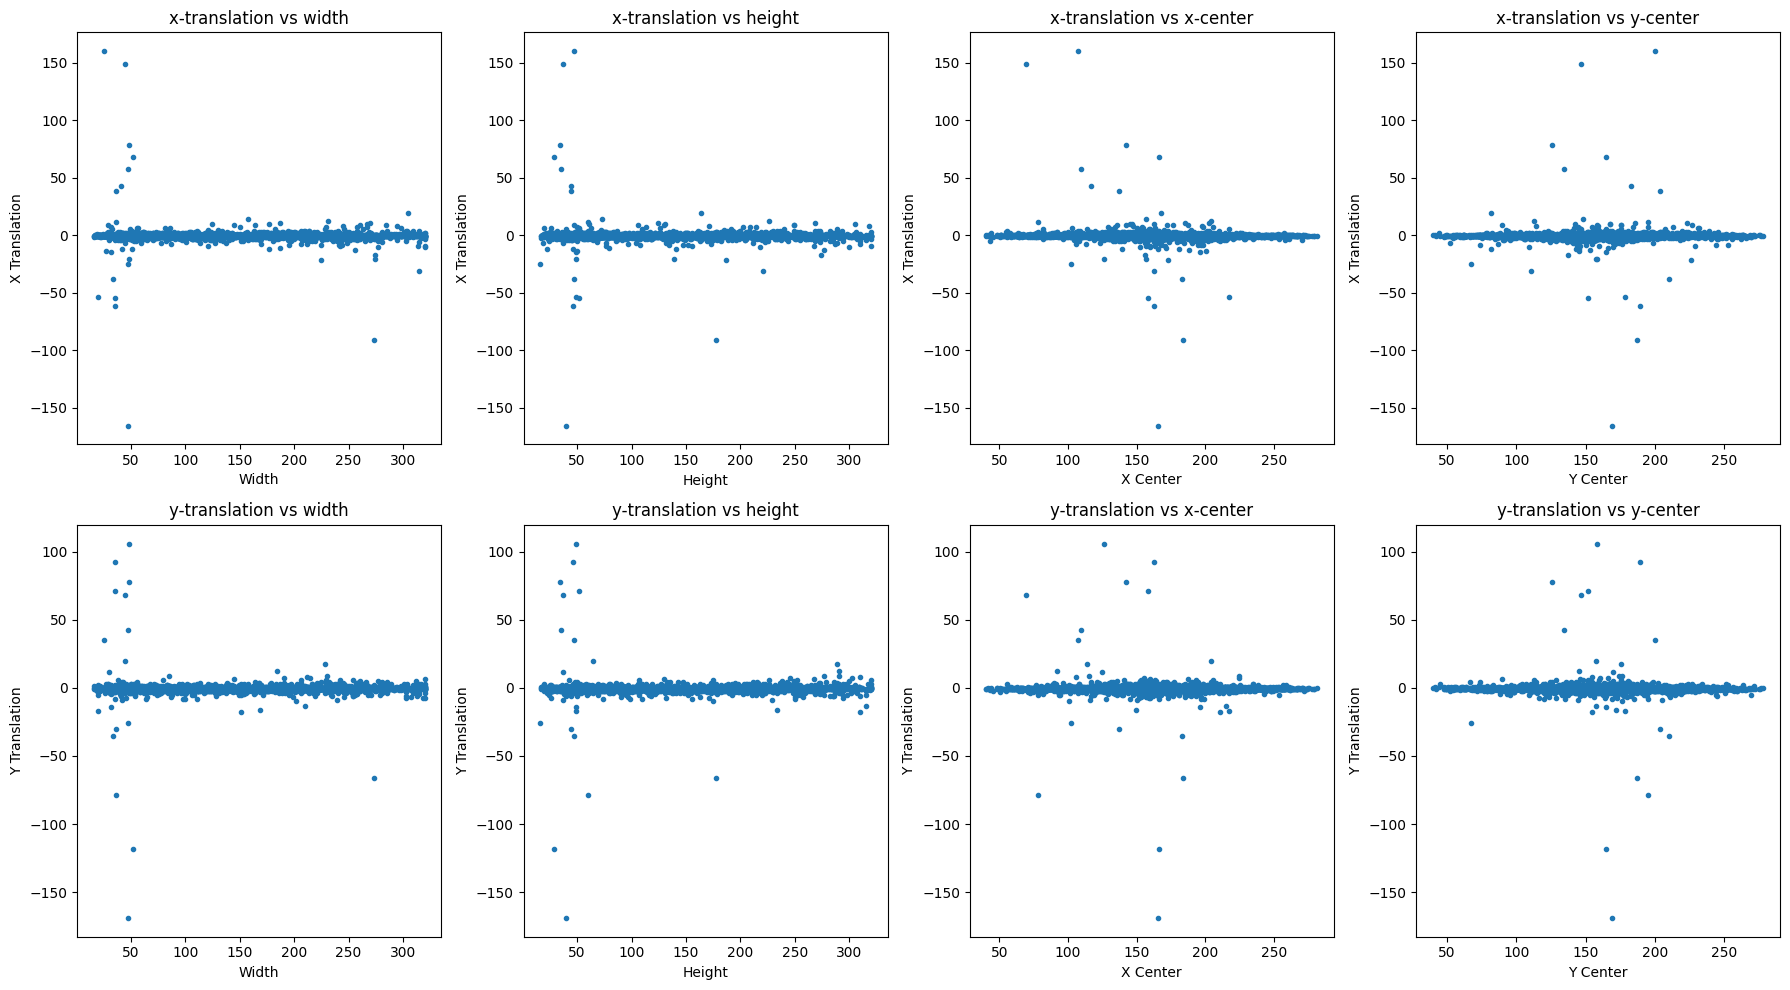

In [17]:
fig, axs = plt.subplots(2, 4, figsize=(18, 10))

# X translations vs width
axs[0, 0].scatter(width, x_translation, marker='.')
axs[0, 0].set_title('x-translation vs width')
axs[0, 0].set_xlabel('Width')
axs[0, 0].set_ylabel('X Translation')

# X translations vs height
axs[0, 1].scatter(height, x_translation, marker='.')
axs[0, 1].set_title('x-translation vs height')
axs[0, 1].set_xlabel('Height')
axs[0, 1].set_ylabel('X Translation')

# X translations vs x-center
axs[0, 2].scatter(x_center, x_translation, marker='.')
axs[0, 2].set_title('x-translation vs x-center')
axs[0, 2].set_xlabel('X Center')
axs[0, 2].set_ylabel('X Translation')

# X translations vs y-center
axs[0, 3].scatter(y_center, x_translation, marker='.')
axs[0, 3].set_title('x-translation vs y-center')
axs[0, 3].set_xlabel('Y Center')
axs[0, 3].set_ylabel('X Translation')

# Y translations vs width
axs[1, 0].scatter(width, y_translation, marker='.')
axs[1, 0].set_title('y-translation vs width')
axs[1, 0].set_xlabel('Width')
axs[1, 0].set_ylabel('Y Translation')

# Y translations vs height
axs[1, 1].scatter(height, y_translation, marker='.')
axs[1, 1].set_title('y-translation vs height')
axs[1, 1].set_xlabel('Height')
axs[1, 1].set_ylabel('Y Translation')

# Y translations vs x-center
axs[1, 2].scatter(x_center, y_translation, marker='.')
axs[1, 2].set_title('y-translation vs x-center')
axs[1, 2].set_xlabel('X Center')
axs[1, 2].set_ylabel('Y Translation')

# Y translations vs y-center
axs[1, 3].scatter(y_center, y_translation, marker='.')
axs[1, 3].set_title('y-translation vs y-center')
axs[1, 3].set_xlabel('Y Center')
axs[1, 3].set_ylabel('Y Translation')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()